In [ ]:
# matplotlib
# use dataset in tableau for clustering
# unsupervised learning
# extarct insights

In [277]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing

In [278]:
cust_file = pd.read_csv("Mall_customers.csv")
cust_file.shape #(200, 5)
cust_file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [279]:
cust_file.columns   # 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
cust_file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


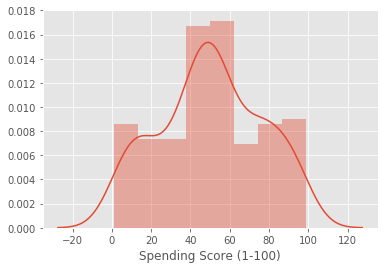

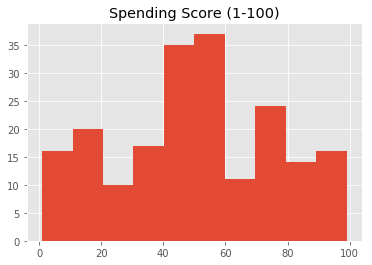

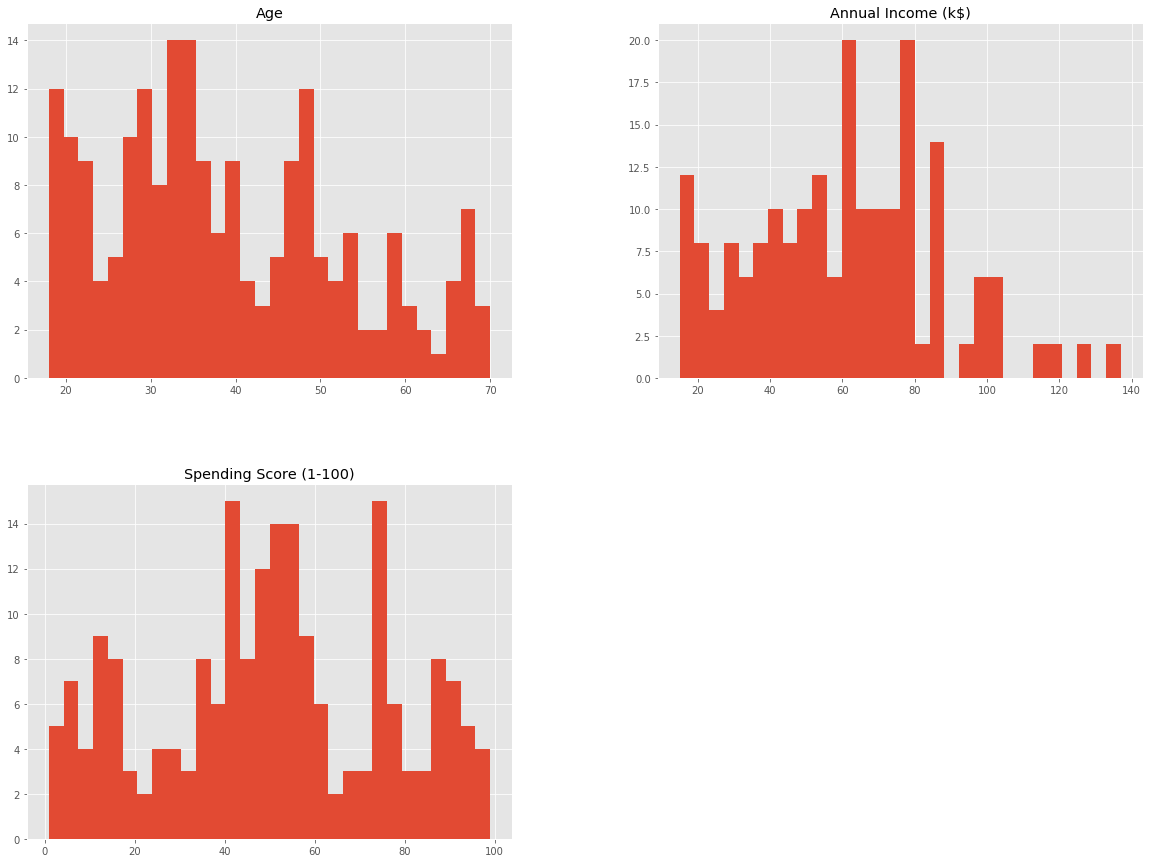

In [280]:
# first type
sns.distplot(cust_file['Spending Score (1-100)'])
plt.show()

# second type
cust_file.hist(column = 'Spending Score (1-100)')
plt.show()

# histogram of all variables together
cust_file.drop('CustomerID', 1).hist(bins = 30, figsize=(20,15))
plt.show()

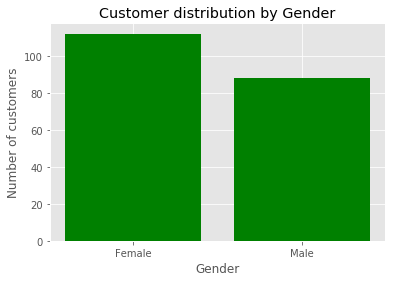

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cnt = cust_file.groupby('Gender').count().reset_index()
x        = cnt.Gender.unique()
cnt_cust = cnt.CustomerID.unique()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, cnt_cust, color='green')
plt.xlabel("Gender")
plt.ylabel("Number of customers")
plt.title("Customer distribution by Gender")

plt.xticks(x_pos, x)

plt.show()

In [282]:
# try out - not the part of main code
#cust_file.Gender.unique()
#cnt = cust_file.Gender.value_counts()
cnt = cust_file.groupby('Gender').count().reset_index()
cnt.columns

Index(['Gender', 'CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [283]:
# try out- not the part of main code
cnt.Gender.unique()
cnt.CustomerID.unique()

array([112,  88], dtype=int64)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000            0.059912               -0.375439
Annual Income (k$)      0.059912            1.000000                0.047542
Spending Score (1-100) -0.375439            0.047542                1.000000


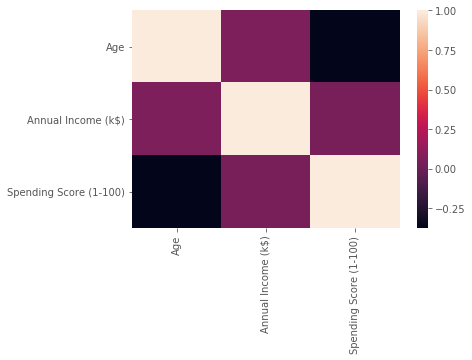

In [284]:
# correlation plot for female
cust_file_fem = cust_file[cust_file['Gender']=='Female'].drop('CustomerID', 1)
cust_file_corr_fem = cust_file_fem.corr()
print(cust_file_corr_fem)

sns.heatmap(cust_file_corr_fem, xticklabels = cust_file_corr_fem.columns, yticklabels = cust_file_corr_fem.columns)
plt.show()

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.092978               -0.279628
Annual Income (k$)     -0.092978            1.000000               -0.023684
Spending Score (1-100) -0.279628           -0.023684                1.000000


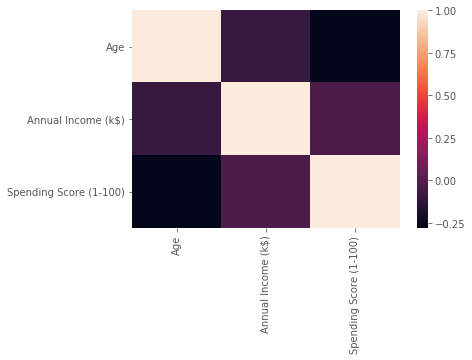

In [285]:
# correlation plot for male
cust_file_male = cust_file[cust_file['Gender']=='Male'].drop('CustomerID', 1)
cust_file_corr_male = cust_file_male.corr()
print(cust_file_corr_male)

sns.heatmap(cust_file_corr_male, xticklabels = cust_file_corr_male.columns, yticklabels = cust_file_corr_male.columns)
plt.show()

In [286]:
# Spending score is negatively correlated with age both within males and females. Younger women tend to spend more.

In [287]:
#Male female stacked bar chart
cust_file_age_bins = pd.cut(cust_file['Age'], bins=5).value_counts().reset_index()
cust_file_age_bins

,index,Age
0,"(28.4, 38.8]",63
1,"(17.948, 28.4]",50
2,"(38.8, 49.2]",42
3,"(49.2, 59.6]",25
4,"(59.6, 70.0]",20


In [312]:
cut_labels_4 = ['< 25', '26-30','30-35', '36-45', '46-55','56-64', '> 65']
cut_bins = [0, 25, 30, 35, 45, 55, 64, 100]
cust_file['Age_bin'] = pd.cut(cust_file['Age'], bins=cut_bins, labels=cut_labels_4)

In [313]:
cust_file.groupby('Age_bin').count().reset_index()

,Age_bin,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,< 25,38,38,38,38,38
1,26-30,24,24,24,24,24
2,30-35,36,36,36,36,36
3,36-45,36,36,36,36,36
4,46-55,37,37,37,37,37
5,56-64,15,15,15,15,15
6,> 65,14,14,14,14,14


In [314]:
cust_file.sort_values(by = ['Age_bin'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_bin
0,1,Male,19,15,39,< 25
33,34,Male,18,33,92,< 25
35,36,Female,21,33,81,< 25
39,40,Female,20,37,75,< 25
41,42,Male,24,38,92,< 25
45,46,Female,24,39,65,< 25
61,62,Male,19,46,55,< 25
65,66,Male,18,48,59,< 25
68,69,Male,19,48,59,< 25
78,79,Female,23,54,52,< 25


In [315]:
cust_file.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_bin
0,1,Male,19,15,39,< 25
1,2,Male,21,15,81,< 25
2,3,Female,20,16,6,< 25
3,4,Female,23,16,77,< 25
4,5,Female,31,17,40,30-35
5,6,Female,22,17,76,< 25
6,7,Female,35,18,6,30-35
7,8,Female,23,18,94,< 25
8,9,Male,64,19,3,56-64
9,10,Female,30,19,72,26-30


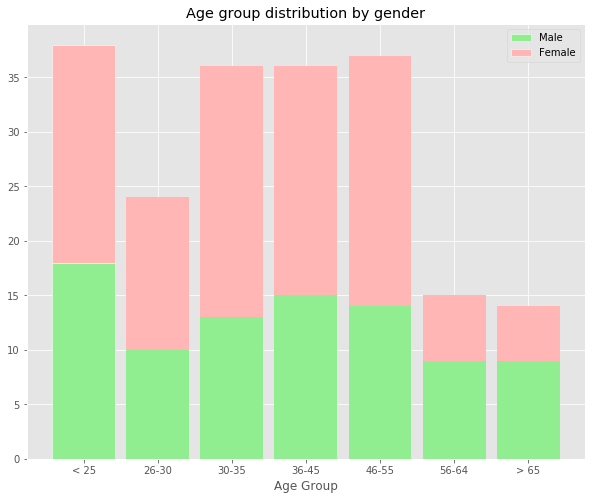

In [317]:
# # libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import rc
# import pandas as pd
 
# Data
r = [0,1,2,3,4,5,6]
Gender = ['Male', 'Female']
cust_file_male_age_bin = cust_file[cust_file['Gender']=='Male'].groupby('Age_bin').count().reset_index()

cust_file_fem_age_bin = cust_file[cust_file['Gender']=='Female'].groupby('Age_bin').count().reset_index()

raw_data = {'greenBars': cust_file_male_age_bin['Gender'].values, 
            'orangeBars': cust_file_fem_age_bin['Gender'].values}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]


greenBars = df['greenBars']
orangeBars = df['orangeBars']

fig = plt.figure(figsize=(10, 8))
 
# plot
barWidth = 0.85
names = cust_file['Age_bin'].unique()
names.sort_values()
# Create green Bars
plt.bar(r, greenBars, color='#90ee90', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#ffb6b5', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names.sort_values())
plt.xlabel("Age Group")

#plt.ylabel('Scores')
plt.title('Age group distribution by gender')
plt.legend(Gender, loc = 1)

 
# Show graphic
plt.show()


In [318]:
# Females are slightly higher than males in our database. We have more young crowd that is people from 26-35 in our database


#greenBars
#names.sort_values()

In [102]:
# cust_file_male_age_bin = cust_file[cust_file['Gender']=='Male'].groupby('Age_bin').count().reset_index()
# cust_file_male_age_bin['Gender'].values

# cust_file_fem_age_bin = cust_file[cust_file['Gender']=='Female'].groupby('Age_bin').count().reset_index()
# cust_file_fem_age_bin['Gender'].values

array([18, 10, 13, 15, 23,  9], dtype=int64)

## Clsutering start

In [319]:
from sklearn.cluster import KMeans

In [320]:
cust_file.drop(['CustomerID','Age_bin'],inplace = True, axis = 1)
cust_file.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [321]:
cust_file["Gender"] = cust_file["Gender"].astype('category')
cust_file["Gender_dummy"] = cust_file["Gender"].cat.codes
# Gender_dummy = pd.get_dummies(cust_file.Gender, prefix = 'Gender_dummy')
# cust_file = pd.concat([cust_file, Gender_dummy], axis=1)
drops = ['Gender']
cust_file.drop(drops, inplace=True, axis=1)

In [322]:
cust_file.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_dummy
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [323]:
kmean=KMeans(n_clusters=3)
kmean.fit(cust_file)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [324]:
#kmean.cluster_centers_
#kmean.labels_

In [325]:
X=cust_file.iloc[:, [1,2]].values

Cluster 1 Inertia 269981.28
Cluster 2 Inertia 181363.59595959596
Cluster 3 Inertia 106348.37306211118
Cluster 4 Inertia 73679.78903948834
Cluster 5 Inertia 44448.45544793371
Cluster 6 Inertia 37265.86520484347
Cluster 7 Inertia 30259.65720728547
Cluster 8 Inertia 25095.703209997548
Cluster 9 Inertia 21830.041978049434
Cluster 10 Inertia 20736.679938924124
Cluster 11 Inertia 17702.595932296277
Cluster 12 Inertia 15810.838613705502
Cluster 13 Inertia 14763.330402558204
Cluster 14 Inertia 13165.329070181624
Cluster 15 Inertia 12064.93900069229
Cluster 16 Inertia 10788.847033763337
Cluster 17 Inertia 10585.021275946276
Cluster 18 Inertia 9071.935658374023
Cluster 19 Inertia 8566.599192715497


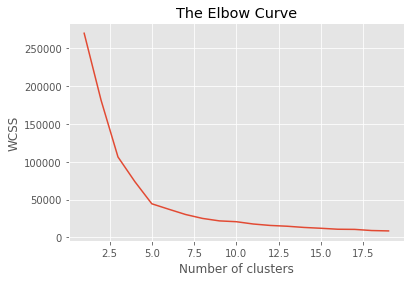

In [326]:

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [327]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. 
# The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  
#called y K-means

y_kmeans = kmeans.fit_predict(X)

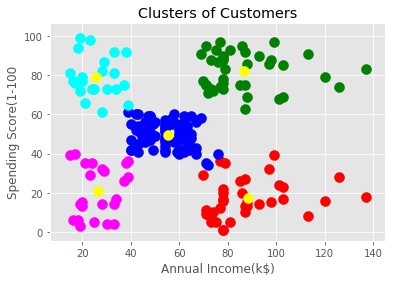

In [328]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [333]:
# Observations

    #1. We have 5 distinct groups of cusotmers in mall dataset. 
    #2. Pink group => Wise (low income - low spending)
    #   Red group  => Miser (High income - low spending)
    #   Blue group => Optimal 
    #   Cyan group => Extravagant (Low income - high spending)
    #   Green group=> Rich (High income - high spending)

#### Additional analysis for male female clustering analysis

In [329]:
# cust_file_male = cust_file[cust_file['Gender_dummy']==0]
# X_2 = cust_file_male.iloc[:,[0,2]].values


cust_file_female = cust_file[cust_file['Gender_dummy']==1]
X_2 = cust_file_female.iloc[:,[0,2]].values

Cluster 1 Inertia 88647.70454545454
Cluster 2 Inertia 39166.58333333333
Cluster 3 Inertia 22448.442586399105
Cluster 4 Inertia 13878.917588932805
Cluster 5 Inertia 10431.983566433566
Cluster 6 Inertia 8161.681041181041
Cluster 7 Inertia 6433.969347319347
Cluster 8 Inertia 5504.458888333889
Cluster 9 Inertia 4803.828088578088
Cluster 10 Inertia 4198.390207015207
Cluster 11 Inertia 3796.286457986458


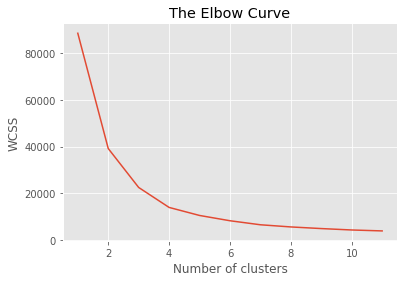

In [330]:

wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_2)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)

plt.plot(range(1,12),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [331]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. 
# The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  
#called y K-means

y_kmeans = kmeans.fit_predict(X_2)

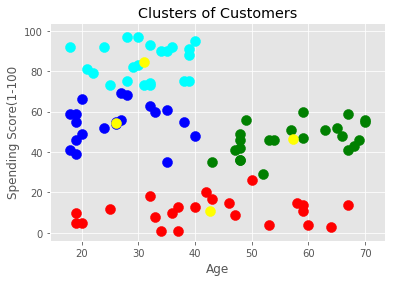

In [332]:
#6 Visualising the clusters
plt.scatter(X_2[y_kmeans==0, 0], X_2[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_2[y_kmeans==1, 0], X_2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_2[y_kmeans==2, 0], X_2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_2[y_kmeans==3, 0], X_2[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(X_2[y_kmeans==4, 0], X_2[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
# plt.scatter(X_2[y_kmeans==5, 0], X_2[y_kmeans==5, 1], s=100, c='brown', label ='Cluster 6')
# plt.scatter(X_2[y_kmeans==6, 0], X_2[y_kmeans==6, 1], s=100, c='purple', label ='Cluster 7')
# plt.scatter(X_2[y_kmeans==7, 0], X_2[y_kmeans==7, 1], s=100, c='violet', label ='Cluster 8')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100')
plt.show()

### Thank you!!

#### Tuning: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
#### Algo: https://towardsdatascience.com/k-means-clustering-with-python-code-explained-5a792bd19548

In [132]:
#cust_file.drop(['CustomerID','Age_bin'], 1)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_bin'],
      dtype='object')

In [134]:
#cust_file.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_bin'],
      dtype='object')